In [2]:
from joblib import dump, load
from pandas import DataFrame, read_csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from bigml.api import BigML
api = BigML(project="project/5dc0232e1efc927c130037fe")

In [4]:
source_train = api.create_source('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-train.csv')

In [9]:
# On crée un dataset à partir de la source puis on split (Val et Test)

train_full = api.create_dataset(source_train, {"name": "Train Full"})
val_set = api.create_dataset(train_full, {"name": "Val_set", "sample_rate": 0.8, "seed": "my seed"})
test_set = api.create_dataset(train_full, {"name": "Test_set", "sample_rate": 0.8 , "seed": "my seed", "out_of_bag": True})

In [10]:
# creation des listes vides pour contenir l'abscisse (taille du dataset) et l'ordonnée (AUC) pour le modele ensemble et deepnet

x_ensemble = []
y_ensemble = []
x_deepnet = []
y_deepnet = []

for i in range(1,11): # On fait une boucle pour faire varier de 10 à 100 % de lignes du dataset Val_set
   
    # On crée le nouveau dataset de train à partir du dataset de train initial
    train_set = api.create_dataset(val_set, {"name": "Train Set " + str(i/10), "sample_rate": i/10, "seed": "my seed"})
    api.ok(val_set)   
   
    # On crée le modèle (ensemble) à partir du train_set
    ensemble = api.create_ensemble(train_set, {"objective_field" : "SeriousDlqin2yrs", "name": "Ensemble " + str(i/10)})
    api.ok(ensemble)
   
    # On évalue le modèle ensemble (avec le test_set)
    evaluation = api.create_evaluation(ensemble, test_set)
    api.ok(evaluation)
   
    # On crée le modèle (deepnet) à partir du train_set
    deepnet = api.create_deepnet(train_set, {"objective_field" : "SeriousDlqin2yrs", "name": "Deepnet " + str(i/10)})
    api.ok(deepnet)
   
    # On évalue le modèle deepnet (avec le test_set)
    evaluation_deepnet = api.create_evaluation(deepnet, test_set)
    api.ok(evaluation_deepnet)

    # On stocke dans une liste la valeur de l'axe des abscisses (graph_x) et la valeur de l'AUC (graph_y) à partir de la donnée BigML
    x_ensemble.append(i*10)
    y_ensemble.append(evaluation['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve'])
    
    x_deepnet.append(i*10)
    y_deepnet.append(evaluation_deepnet['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve'])
    
    # On itere de 1 le compteur i et on recommence la boucle
    i += 1

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.83111, 0.84304, 0.84761, 0.85056, 0.85382, 0.85311, 0.85428, 0.85373, 0.85395, 0.85574]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.83111, 0.84304, 0.84761, 0.85056, 0.85382, 0.85311, 0.85428, 0.85373, 0.85395, 0.85574]


In [56]:
# On imprime les resultats
    
print(x_ensemble)
print(y_ensemble)
print(x_deepnet)
print(y_deepnet) 

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.83111, 0.84304, 0.84761, 0.85056, 0.85382, 0.85311, 0.85428, 0.85373, 0.85395, 0.85574]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.8184, 0.82239, 0.83516, 0.82896, 0.83169, 0.82009, 0.82913, 0.8263, 0.83729, 0.83564]


In [20]:
eval_laurent = [x_ensemble, y_ensemble, y_deepnet]
dump(eval_laurent, 'eval_laurent.joblib')

['eval_laurent.joblib']

In [6]:
eval_christophe = load('eval_christophe.joblib')
eval_maxime = load('eval_maxime.joblib')
eval_maud = load('eval_maud.joblib')
eval_laurent = load('eval_laurent.joblib')

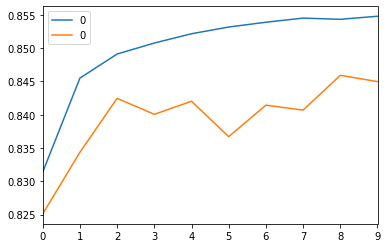

In [24]:
ensemble_moyenne = (DataFrame(eval_christophe[1]) + DataFrame(eval_maxime[1]) + DataFrame(eval_laurent[1]) + DataFrame(eval_maud[1]))/4
deepnet_moyenne = (DataFrame(eval_christophe[2]) + DataFrame(eval_maxime[2]) + DataFrame(eval_laurent[2]) + DataFrame(eval_maud[2]))/4
ax = plt.subplot()
ensemble_moyenne.plot(ax=ax, label='ensemble')
deepnet_moyenne.plot(ax=ax, label='deepnet');

In [25]:
x_ensemble = []
y_ensemble = []
y_deepnet = []
y_ensemble_mean = []
y_deepnet_mean = []

for i in range(10): 
    y_ensemble = (eval_christophe[1][i] + eval_maxime[1][i] + eval_laurent[1][i] + eval_maud[1][i])/4
    y_deepnet = (eval_christophe[2][i] + eval_maxime[2][i] + eval_laurent[2][i] + eval_maud[2][i])/4
    y_ensemble_mean.append(y_ensemble)
    y_deepnet_mean.append(y_deepnet)
    
print(y_deepnet_mean)

[0.82511, 0.8343575, 0.8424499999999999, 0.840055, 0.8420225, 0.8367025, 0.8414275000000001, 0.8406875, 0.8459074999999999, 0.8449650000000001]
